## Crypto Arbitrage

As Bitcoin trades on markets across the globe, the price discrepancies can be capitalized on by simultaneous price dislocations between leading exchanges.  The data analysis library ```Pandas``` empowers data visualization and highlights the frequency of such trading opportunities.

This report sorts through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. It applies the three phases of financial analysis to determine if any arbitrage opportunities existed for Bitcoin.

This methodology will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# First determine how many NaN values the dataset contains.
bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [7]:
# Remove the missing values by using the dropna() method.
bitstamp=bitstamp.dropna()

In [8]:
# Verify the missing values have been dropped.
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [9]:
# Use the str.replace function to remove the dollar sign, $
# Need to verify the $ presence
bitstamp['Close'].head()

Timestamp
2018-01-01 00:00:00    $13646.48
2018-01-01 00:01:00    $13658.75
2018-01-01 00:02:00    $13610.22
2018-01-01 00:03:00    $13639.09
2018-01-01 00:04:00     $13620.0
Name: Close, dtype: object

In [10]:
#Drop using the str.replace method
bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].str.replace("$","",regex=True)

In [11]:
#Verify the dollar sign is dropped
bitstamp['Close'].head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00     13620.0
Name: Close, dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [12]:
# Convert the Close data type to a float
bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].astype('float')

In [13]:
#Verify the close data type is now a float
bitstamp.loc[:,'Close'].dtypes

dtype('float64')

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [14]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

In [15]:
#No duplicated data values are found.

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [16]:
# Repeat Steps 1–4 for the coinbase DataFrame.  Code is identical, except need to replace the bitstamp dataframe with coinbase.

### Step 5.1: For the coinbase DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [17]:
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
# First determine how many NaN values the dataset contains.
coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [18]:
# Remove the missing values by using the dropna() method.
coinbase=coinbase.dropna()

In [19]:
# Verify the missing values have been dropped.
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 5.2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [20]:
# Use the str.replace function to remove the dollar sign, $
# Need to verify the $ presence
coinbase['Close'].head()

Timestamp
2018-01-01 00:00:00    $13608.49
2018-01-01 00:01:00    $13601.66
2018-01-01 00:02:00     $13580.0
2018-01-01 00:03:00    $13550.34
2018-01-01 00:04:00    $13583.44
Name: Close, dtype: object

In [21]:
#Drop using the str.replace method
coinbase.loc[:,'Close'] = coinbase.loc[:,'Close'].str.replace("$","",regex=True)

In [22]:
#Verify the dollar sign is dropped
coinbase['Close'].head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00     13580.0
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: object

### Step 5.3: Convert the data type of the Close column to a `float`.

In [23]:
# Convert the Close data type to a float
coinbase.loc[:,'Close'] = coinbase.loc[:,'Close'].astype('float')

In [24]:
#Verify the close data type is now a float
coinbase.loc[:,'Close'].dtypes

dtype('float64')

### Step 5.4: Review the data for duplicated values, and drop them if necessary.

In [25]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()

0

In [26]:
#No duplicated data values are found.

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the coinbase and coinbase DataFrames:

* Timestamp (index)

* Close


In [27]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,'Close']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [28]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,'Close']

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [29]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [30]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp - BTC Closing Price - 2018 Q1'}, xlabel='Timestamp'>

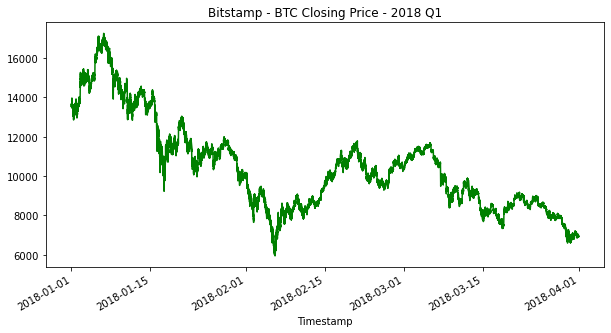

In [31]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(kind='line',
              figsize=(10,5),
              title='Bitstamp - BTC Closing Price - 2018 Q1',
              color='green')

<AxesSubplot:title={'center':'Coinbase - BTC Closing Price - 2018 Q1'}, xlabel='Timestamp'>

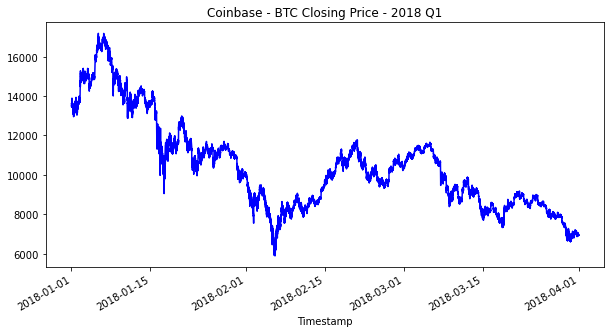

In [32]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(kind='line',
              figsize=(10,5),
              title='Coinbase - BTC Closing Price - 2018 Q1',
              color='blue')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase BTC Closing Price - 2018 Q1'}, xlabel='Timestamp'>

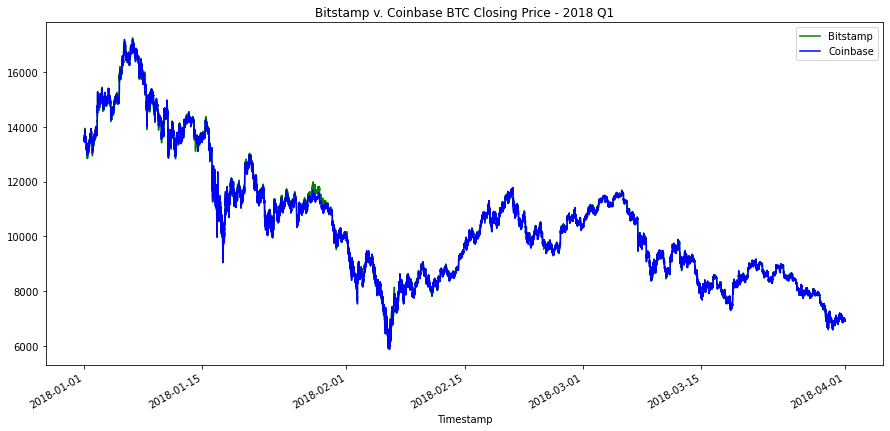

In [33]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(kind='line',
                     legend=True,
                     label='Bitstamp',
              figsize=(15,10),
              title='Bitstamp v. Coinbase BTC Closing Price - 2018 Q1',
              color='green')
coinbase_sliced.plot(kind='line',
                     legend=True,
                     label='Coinbase',
              figsize=(15,7),
              color='blue')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase BTC Closing Price - January 2018'}, xlabel='Timestamp'>

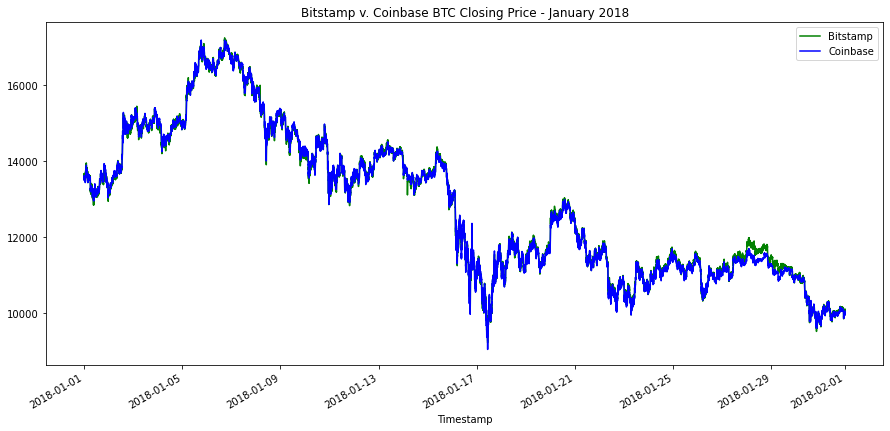

In [34]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018-01-01':'2018-01-31'].plot(
    kind='line',
    legend=True,
    label='Bitstamp',
    figsize=(15,7),
    title='Bitstamp v. Coinbase BTC Closing Price - January 2018',
    color='green'
)
coinbase_sliced.loc['2018-01-01':'2018-01-31'].plot(
    kind='line',
    legend=True,
    label='Coinbase',
    figsize=(15,7),
    color='blue'
)

<AxesSubplot:title={'center':'Bitstamp v. Coinbase BTC Closing Price - March 2018'}, xlabel='Timestamp'>

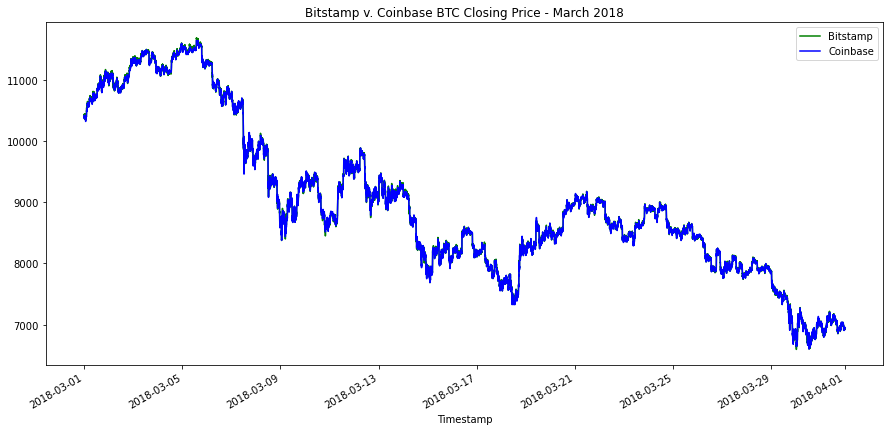

In [35]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-03-01':'2018-03-31'].plot(kind='line',
                     legend=True,
                     label='Bitstamp',
              figsize=(15,7),
              title='Bitstamp v. Coinbase BTC Closing Price - March 2018',
              color='green')
coinbase_sliced.loc['2018-03-01':'2018-03-31'].plot(kind='line',
                     legend=True,
                     label='Coinbase',
              figsize=(15,7),
              color='blue')

**Question** Based on the visualizations of the different time periods, has the degree of spread changed as time progressed?

**Answer** Based on the visualizations, the degree of spread has decreased between Bitstamp and Coinbase as time progressed from January 2018 to March 2018.  In January 2018, on average, the price of BTC listed on Bitstamp was higher than the price listed on Coinbase.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

## Analysis for January 28, 2018

### Overlay Closing Price Plots

<AxesSubplot:title={'center':'Bitstamp v. Coinbase BTC Closing Price - January 28, 2018'}, xlabel='Timestamp'>

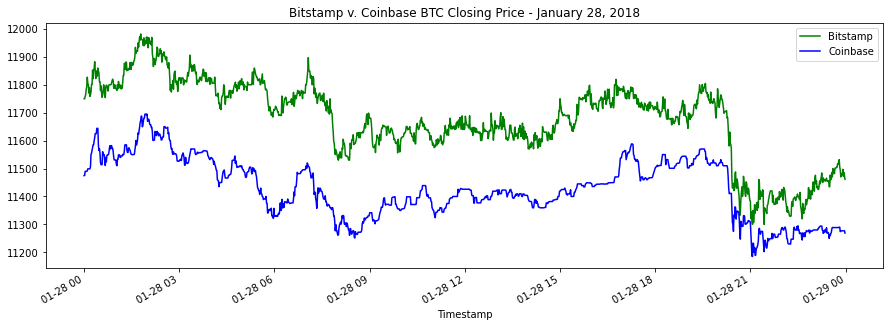

In [36]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

#Early date: January 28, 2018

bitstamp_sliced.loc['2018-01-28'].plot(
    kind='line',
    legend=True,
    label='Bitstamp',
    figsize=(15,5),
    title='Bitstamp v. Coinbase BTC Closing Price - January 28, 2018',
    color='green'
)
coinbase_sliced.loc['2018-01-28'].plot(
    kind='line',
    legend=True,
    label='Coinbase',
    figsize=(15,5),
    color='blue'
)

In [37]:
#Summary Stats for Bitstamp on Jan 28, 2018
bitstamp_sliced.loc['2018-01-28'].describe()

count     1436.000000
mean     11675.885780
std        141.433618
min      11300.000000
25%      11609.897500
50%      11691.725000
75%      11777.530000
max      11982.000000
Name: Close, dtype: float64

In [38]:
#Summary Stats for Coinbase on Jan 28, 2018
coinbase_sliced.loc['2018-01-28'].describe()

count     1440.000000
mean     11428.265889
std        106.287640
min      11185.010000
25%      11356.560000
50%      11421.005000
75%      11513.927500
max      11694.980000
Name: Close, dtype: float64

### Arbitrage Spread

In [39]:
#Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the coinbase lower closing prices from the bitstamp higher closing prices
#Jan 28, 2018

arbitrage_spread_early = bitstamp_sliced.loc['2018-01-28'] - coinbase_sliced.loc['2018-01-28']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'BTC spread (Bitstamp - Coinbase)'}>

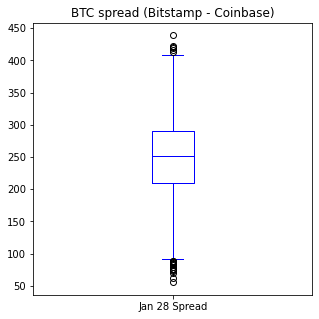

In [40]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box',
                            label = 'Jan 28 Spread',
                            color='blue',
                            figsize=(5,5),
                            title='BTC spread (Bitstamp - Coinbase)')

## Analysis for February 14, 2018

### Overlay Closing Price Plots

<AxesSubplot:title={'center':'Bitstamp v. Coinbase BTC Closing Price - February 14, 2018'}, xlabel='Timestamp'>

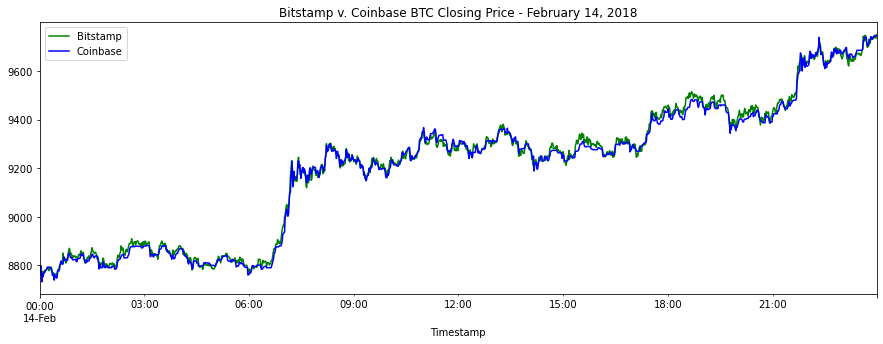

In [41]:
#Middle date: February 14, 2018

bitstamp_sliced.loc['2018-02-14'].plot(
    kind='line',
    legend=True,
    label='Bitstamp',
    figsize=(15,5),
    title='Bitstamp v. Coinbase BTC Closing Price - February 14, 2018',
    color='green'
)
coinbase_sliced.loc['2018-02-14'].plot(
    kind='line',
    legend=True,
    label='Coinbase',
    figsize=(15,5),
    color='blue'
)

In [42]:
#Summary Stats for Bitstamp on Feb 14, 2018
bitstamp_sliced.loc['2018-02-14'].describe()

count    1440.000000
mean     9207.598535
std       274.138412
min      8754.140000
25%      8879.977500
50%      9264.065000
75%      9406.902500
max      9748.980000
Name: Close, dtype: float64

In [43]:
#Summary Stats for Coinbase on Feb 14, 2018
coinbase_sliced.loc['2018-02-14'].describe()

count    1440.000000
mean     9200.881674
std       275.149031
min      8732.060000
25%      8868.837500
50%      9264.995000
75%      9387.685000
max      9745.630000
Name: Close, dtype: float64

### Arbitrage Spread

In [44]:
#Using the middle date that you have selected, calculate the arbitrage spread 
# by subtracting the coinbase lower closing prices from the bitstamp higher closing prices
#Feb 14, 2018
arbitrage_spread_mid = bitstamp_sliced.loc['2018-02-14'] - coinbase_sliced.loc['2018-02-14']

# Generate summary statistics for the early DataFrame
arbitrage_spread_mid.describe()

count    1440.000000
mean        6.716861
std        15.037548
min       -33.620000
25%        -3.637500
50%         7.080000
75%        17.012500
max        65.190000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'BTC spread (Bitstamp - Coinbase)'}>

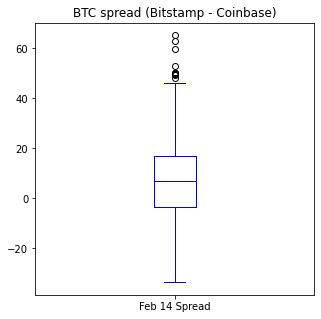

In [45]:
# Visualize the arbitrage spread from the middle date in the dataset in a box plot
#Feb 14, 2018
arbitrage_spread_mid.plot(kind='box',
                            label = 'Feb 14 Spread',
                            color='blue',
                            figsize=(5,5),
                            title='BTC spread (Bitstamp - Coinbase)')

## Analysis for March 28, 2018

### Overlay Closing Price Plots

<AxesSubplot:title={'center':'Bitstamp v. Coinbase BTC Closing Price - March 28, 2018'}, xlabel='Timestamp'>

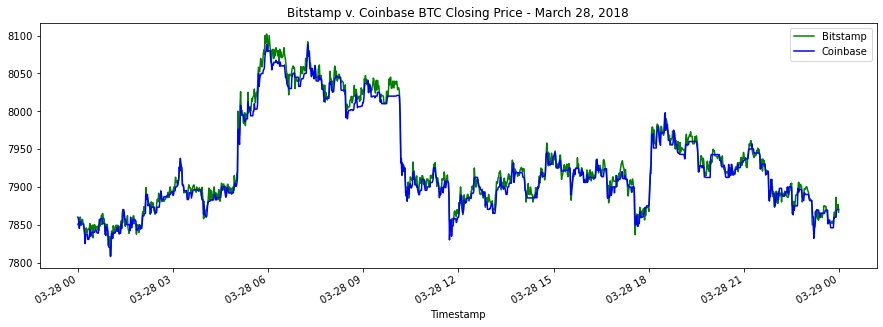

In [46]:
#Later date: March 28, 2018

bitstamp_sliced.loc['2018-03-28'].plot(
    kind='line',
    legend=True,
    label='Bitstamp',
    figsize=(15,5),
    title='Bitstamp v. Coinbase BTC Closing Price - March 28, 2018',
    color='green'
)
coinbase_sliced.loc['2018-03-28'].plot(
    kind='line',
    legend=True,
    label='Coinbase',
    figsize=(15,5),
    color='blue'
)

In [47]:
#Summary Stats for Bitstamp on Mar 28, 2018
bitstamp_sliced.loc['2018-03-28'].describe()

count    1438.000000
mean     7930.978338
std        64.723201
min      7809.010000
25%      7887.750000
50%      7913.465000
75%      7961.475000
max      8102.150000
Name: Close, dtype: float64

In [48]:
#Summary Stats for Coinbase on Mar 28, 2018
coinbase_sliced.loc['2018-03-28'].describe()

count    1440.00000
mean     7926.45534
std        62.34019
min      7808.00000
25%      7885.45750
50%      7910.08000
75%      7956.05000
max      8088.00000
Name: Close, dtype: float64

### Arbitrage Spread

In [49]:
#Using the later date that you have selected, calculate the arbitrage spread 
# by subtracting the coinbase lower closing prices from the bitstamp higher closing prices

#Mar 28, 2018

arbitrage_spread_late = bitstamp_sliced.loc['2018-03-28'] - coinbase_sliced.loc['2018-03-28']

# Generate summary statistics for the later DataFrame
arbitrage_spread_late.describe()

count    1438.00000
mean        4.42427
std         7.44509
min       -26.30000
25%        -0.48000
50%         4.53500
75%         8.99000
max        28.73000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'BTC spread (Bitstamp - Coinbase)'}>

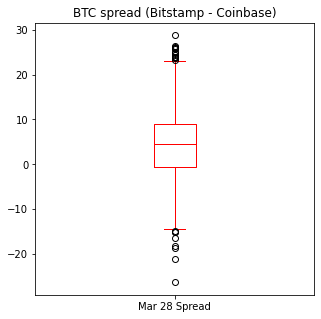

In [50]:
# Visualize the arbitrage spread from late in the dataset in a box plot
#Mar 28, 2018
arbitrage_spread_late.plot(kind='box',
                            label = 'Mar 28 Spread',
                            color='red',
                            figsize=(5,5),
                            title='BTC spread (Bitstamp - Coinbase)')

## Analysis Summary

<AxesSubplot:title={'center':'BTC spread over Q1 2018 (Bitstamp - Coinbase)'}>

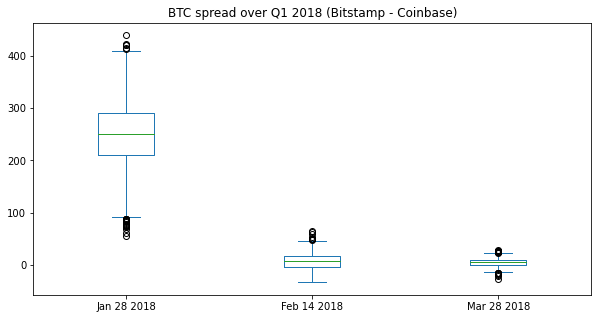

In [51]:
#Summary between dates
arbitrage_spread_summary = pd.DataFrame({'Jan 28 2018': arbitrage_spread_early,
                                        'Feb 14 2018': arbitrage_spread_mid,
                                        'Mar 28 2018': arbitrage_spread_late})
arbitrage_spread_summary.plot(kind='box',
                              legend = True,
                              figsize=(10,5),
                              title='BTC spread over Q1 2018 (Bitstamp - Coinbase)'
                             )

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [52]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early =  bitstamp_sliced.loc['2018-01-28'] - coinbase_sliced.loc['2018-01-28']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early>0].describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [53]:
# For the date middle in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_middle =  bitstamp_sliced.loc['2018-02-14'] - coinbase_sliced.loc['2018-02-14']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle[arbitrage_spread_middle>0].describe()

count    958.000000
mean      14.950010
std       10.482675
min        0.010000
25%        7.100000
50%       13.605000
75%       20.970000
max       65.190000
Name: Close, dtype: float64

In [54]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_late =  bitstamp_sliced.loc['2018-03-28'] - coinbase_sliced.loc['2018-03-28']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late[arbitrage_spread_late>0].describe()

count    1028.000000
mean        7.853317
std         5.521699
min         0.010000
25%         3.710000
50%         6.880000
75%        10.712500
max        28.730000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [55]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / coinbase_sliced.loc['2018-01-28']

# Review the spread return DataFrame
spread_return_early.head()

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [56]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / coinbase_sliced.loc['2018-02-14']

# Review the spread return DataFrame
spread_return_middle.head()

Timestamp
2018-02-14 00:00:00         NaN
2018-02-14 00:01:00         NaN
2018-02-14 00:02:00    0.000208
2018-02-14 00:03:00         NaN
2018-02-14 00:04:00    0.003183
Name: Close, dtype: float64

In [57]:
# For the date later in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / coinbase_sliced.loc['2018-03-28']

# Review the spread return DataFrame
spread_return_late.head()

Timestamp
2018-03-28 00:00:00         NaN
2018-03-28 00:01:00         NaN
2018-03-28 00:02:00         NaN
2018-03-28 00:03:00    0.001122
2018-03-28 00:04:00    0.000778
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [58]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>0.01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [59]:
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle>0.01]

# Review the first five profitable trades
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [60]:
# For the date later in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late>0.01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [61]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

In [62]:
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [63]:
# For the date later in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64


* For the three dates, only the date in the early group (January 28,2018) would be able to generate profitable trades of greater than 1%.  

* The date towards the middle (February 14, 2018) and towards the end (March 28, 2018) do not have any arbitrage opportunities with profits above 1%.


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [64]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced.loc['2018-01-28']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
Name: Close, dtype: float64

In [65]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * coinbase_sliced.loc['2018-02-14']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the middle profit DataFrame
profit_per_trade_middle.head()

Series([], Name: Close, dtype: float64)

In [66]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * coinbase_sliced.loc['2018-03-28']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the late profit DataFrame
profit_per_trade_late.head()

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [67]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage profit per trade (> 1%) - January 28, 2018'}, xlabel='Timestamp'>

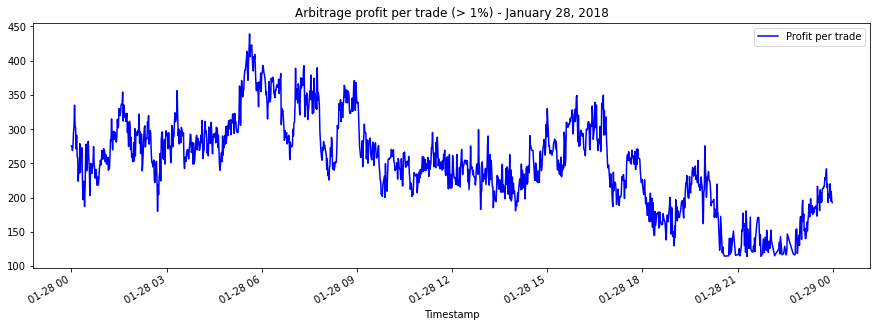

In [68]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(
    kind='line',
    legend=True,
    label='Profit per trade',
    figsize=(15,5),
    title='Arbitrage profit per trade (> 1%) - January 28, 2018',
    color='blue'
)

In [69]:
# Generate the summary statistics for the middle date profit per trade DataFrame
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage profit per trade (> 1%) - February 14, 2018'}, xlabel='Timestamp'>

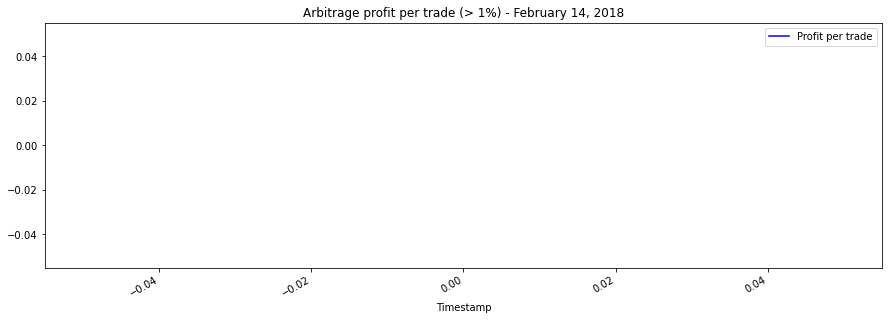

In [84]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(
    kind='line',
    legend=True,
    label='Profit per trade',
    figsize=(15,5),
    title='Arbitrage profit per trade (> 1%) - February 14, 2018',
    color='blue'
)

In [71]:
# Generate the summary statistics for the late date profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage profit per trade (> 1%) - March 28, 2018'}, xlabel='Timestamp'>

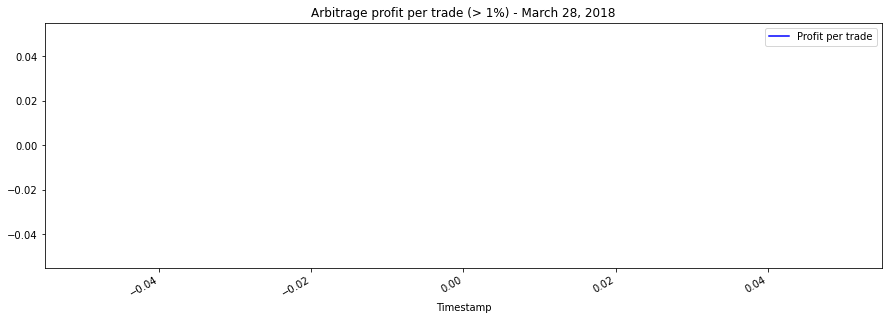

In [85]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(
    kind='line',
    legend=True,
    label='Profit per trade',
    figsize=(15,5),
    title='Arbitrage profit per trade (> 1%) - March 28, 2018',
    color='blue'
)

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [73]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

349918.2900000001

In [74]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_per_trade_middle.sum()

0.0

In [75]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_per_trade_late.sum()

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [76]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative profit - January 28, 2018'}, xlabel='Timestamp'>

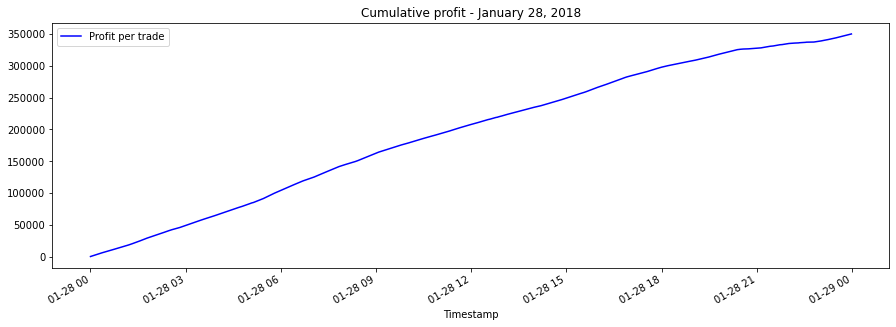

In [77]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(
    kind='line',
    legend=True,
    label='Profit per trade',
    figsize=(15,5),
    title='Cumulative profit - January 28, 2018',
    color='blue'
)

In [78]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative profit - February 14, 2018'}, xlabel='Timestamp'>

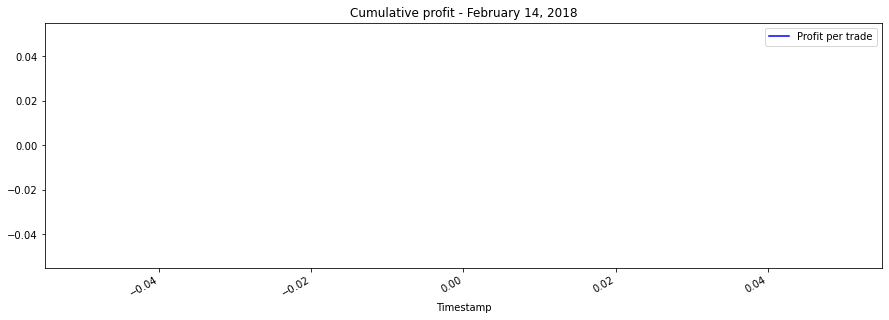

In [79]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(
    kind='line',
    legend=True,
    label='Profit per trade',
    figsize=(15,5),
    title='Cumulative profit - February 14, 2018',
    color='blue'
)

In [80]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative profit - March 28, 2018'}, xlabel='Timestamp'>

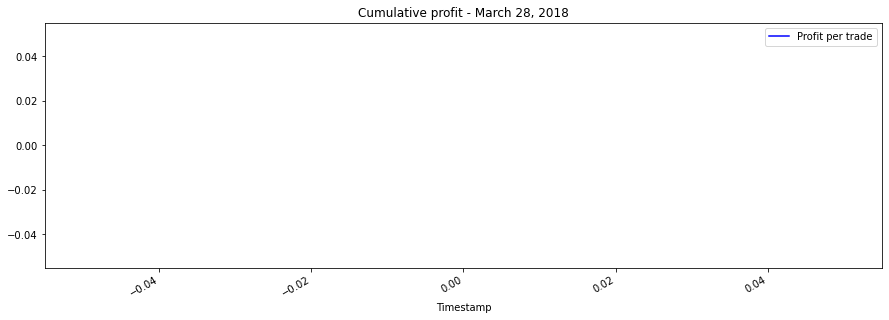

In [81]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot(
    kind='line',
    legend=True,
    label='Profit per trade',
    figsize=(15,5),
    title='Cumulative profit - March 28, 2018',
    color='blue'
)

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The opportunity for arbitrage greatly decreased within the Q1 period of 3 months in 2018.  While larger profits were obtainable in January 2018, consistent profitable trades were not possible between the two exchanges during the dates studied.  It seems like the arbitrage opportunities self-corrected and the BTC pricing between the two exchanges became closer aligned.

# Summaries & Conclusions

The bitcoin arbitrage between the two exchanges Bitstamp and Coinbase was analyzed during the first quarter Q1 of 2018.
The key finding is that an arbitrage opportunity existed during the early days of January 2018, but profitable trades of >1% quickly vanished leading into February and March.  As most arbitrage opportunities, their lifetimes are often cut short by an influx of buyers on the cheaper market (i.e. increasing the price) coupled with an influx of sellers on the more expensive market (i.e. decreasing the price).  These opposing pressures continue until it no longer becomes profitable to exchange the asset between the exchanges.

## Assumptions

* This study primarily studied the closing price of bitcoin at regularly spaced minute intervals from January 1, 2018 to March 31st, 2018.  The only exchanges studied were bitstamp and coinbase.  The spread in the buying and asking prices are not considered.  If these were taken into consideration, perhaps more arbitrage opportunities would be possible.

* The trading volume on each day is also not considered in this analysis.  Although most bitcoin exchanges have high volumes, a shortage in volume would decrease liquidity and inhibit an arbitrage trade.  For this study, full liquidity of each asset on the market is assumed.

* The arbitrage is only considered profitable if the trade returns are greater than 1%.  This is an assumption and is not necessary reflected in the real exchange fees, but is a reasonable metric for allowing extra margin for trading and gas fees.

## Summary tables

The table below summarizes the bitcoin price spread between coinbase and bitstamp on the three dates considered, which were January 28, February 14, and March 28 of 2018.  For the dates surveyed, coinbase mostly had a lower price than bitstamp during these trading days, thus the spread is calculated using price of BTC on bitstamp - price of BTC on coinbase.  

<AxesSubplot:title={'center':'BTC spread over Q1 2018 (Bitstamp - Coinbase)'}>

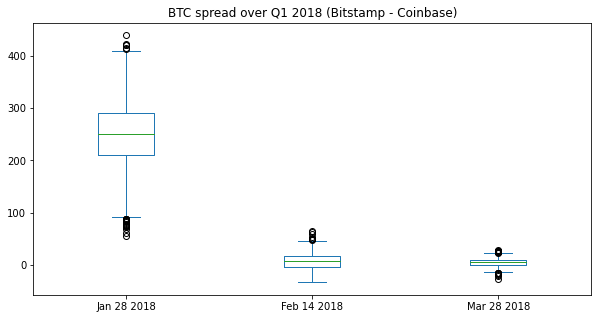

In [82]:
#Summary between dates
arbitrage_spread_summary = pd.DataFrame({'Jan 28 2018': arbitrage_spread_early,
                                        'Feb 14 2018': arbitrage_spread_mid,
                                        'Mar 28 2018': arbitrage_spread_late})
arbitrage_spread_summary.plot(kind='box',
                              legend = True,
                              figsize=(10,5),
                              title='BTC spread over Q1 2018 (Bitstamp - Coinbase)'
                             )

In the above box plot, the greatest mean spread occured on January 28, 2018.  It is also interesting to note that although the mean spread between February 14 and March 28 are both close to zero, the distribution around zero becomes tighter closer to March 28. This implies that the spread between the exchanges approaches zero by the end of the first quarter of 2018. 

<AxesSubplot:>

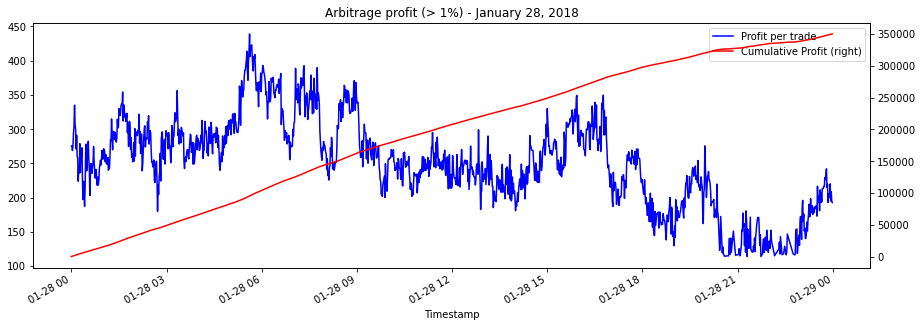

In [83]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(
    kind='line',
    legend=True,
    y='Profit per trade (USD)',
    label='Profit per trade',
    figsize=(15,5),
    title='Arbitrage profit (> 1%) - January 28, 2018',
    color='blue'
)
cumulative_profit_early.plot(
    kind='line',
    legend=True,
    y='Cumulative Profit (USD)',
    secondary_y=True,
    label='Cumulative Profit',
    figsize=(15,5),
    color='red'
)

Of the three days analyzed, only the first date of January 28, 2018 had profitable trades of >1% between the two exchanges.  This arbitrage opportunity did present some pretty sizable profits.  A successful trade would require buying a bitcoin on coinbase and then selling a bitcoin on bitstamp.  If a successful trade were placed between the exchanges every minute for the entire day of January 28, the total cumulative profit (red curve) would be close to 350,000 USD.  

Unfortunately, the other two days analyzed during 2018 Q1 would not have turned any sizable profit greater than transaction and exchange fees.

## Conclusions

Bitcoin arbitrage was indeed a profitable venture in the early days of 2018 (and presumably in times before) between bitstamp and coinbase.  Unfortunately, the large arbitrage profits between the two exchanges were shortlived.  Of the three dates analyzed, only the early date of January 28, 2018 returned a sizable profit and had consistent profitable trades between the exchanges.  As this study shows, as markets mature, it becomes increasingly difficult to find arbitrage opportunities.  While profitable, these opportunities can be fleeting and short-lived if not exploited within a fast timeframe.